In [70]:
from utils import roi_utils
import numpy as np
import copy 
import os

from utils import nsd_utils, default_paths

import pandas as pd
     
import cortex
from plotting import pycortex_plot_utils


In [2]:
# plotting all ROIs in all subjects, using pycortex viewer

roi_def = roi_utils.multi_subject_roi_def(np.arange(1,9), use_default_areas=True)

subjects = np.arange(1,9)
port = 54442
maps = []
names = []
title = 'ROI defs, all subjects'
pycortex_plot_utils.plot_maps_pycortex(subjects, port, maps, names,\
                                       title=title, roi_def=roi_def, \
                        simplest_roi_maps=False)

navigate browser to: 127.0.0.1:54442
Started server on port 54442


<JS: window.viewer>

Stopping server


In [71]:
# Getting voxel counts for all ROIs, all subjects - raw, no thresholding

for ss in np.arange(1,9):
    roi_def = roi_utils.nsd_roi_def(subject=ss, use_default_areas=False)
    n_each = roi_def.get_sizes()
    if ss==1:
        nvox = np.zeros((8, roi_def.n_rois),dtype=int)
        
    nvox[ss-1,:] = n_each
nvox = np.concatenate([nvox, np.sum(nvox, axis=0, keepdims=True)], axis=0)
roi_df = pd.DataFrame(data=nvox, columns=roi_def.roi_names, \
                      index=['%d'%ss for ss in np.arange(1,9)] + ['total'])

In [72]:
roi_df.iloc[:,0:12]

,V1,V2,V3,hV4,VO1-2,PHC1-2,LO1-2,TO1-2,V3ab,IPS0-1,IPS2-5,SPL1
1,2392,2096,1674,721,482,382,488,339,965,1068,1087,164
2,1630,1509,1574,522,424,380,506,419,844,1267,912,201
3,2275,1732,1457,524,498,351,530,522,829,1114,1190,220
4,1526,1301,1172,610,462,351,419,369,710,1230,1043,149
5,1705,1455,1350,704,591,420,345,311,706,919,806,175
6,1771,1739,1938,845,695,485,715,403,883,1135,939,158
7,1926,1475,1348,478,459,305,406,391,739,855,598,142
8,1791,1494,1445,543,489,395,442,504,654,1075,1016,187
total,15016,12801,11958,4947,4100,3069,3851,3258,6330,8663,7591,1396


In [73]:
roi_df.iloc[:,12:24]

,FEF,OPA,PPA,RSC,OFA,FFA-1,FFA-2,mTL-faces,aTL-faces,EBA,FBA-1,FBA-2
1,72,1611,1033,566,355,484,310,0,159,2971,396,430
2,97,1381,994,813,441,340,529,0,275,3439,0,1217
3,74,1330,1269,838,701,697,396,0,159,3518,875,457
4,107,1235,960,813,602,479,463,163,0,3288,137,524
5,64,1332,1221,771,782,452,455,103,148,4587,460,508
6,93,1362,1229,845,519,341,485,0,80,4126,985,301
7,65,1083,912,694,316,346,138,80,231,3062,0,552
8,93,1360,961,799,331,556,648,273,203,3184,433,488
total,665,10694,8579,6139,4047,3695,3424,619,1255,28175,3286,4477


In [23]:
# Getting voxel counts - thresholding with the noise ceiling

nc_thresh = 0.01

for ss in np.arange(1,9):
    roi_def = roi_utils.nsd_roi_def(subject=ss, use_default_areas=False)
    voxel_mask, _, _, ncsnr_full, _ = roi_utils.get_voxel_roi_info(ss, volume_space=True)
    noise_ceiling = nsd_utils.ncsnr_to_nc(ncsnr_full[voxel_mask])/100
  
    if ss==1:
        n_rois = roi_def.n_rois
        nvox = np.zeros((8, n_rois),dtype=int)
    for rr in range(n_rois):
        
        nvox[ss-1,rr] = np.sum(roi_def.get_indices(rr) & (noise_ceiling>nc_thresh))

        
nvox = np.concatenate([nvox, np.sum(nvox, axis=0, keepdims=True)], axis=0)
roi_df = pd.DataFrame(data=nvox, columns=roi_def.roi_names, \
                      index=['%d'%ss for ss in np.arange(1,9)] + ['total'])

In [24]:
roi_df.iloc[:,0:12]

,V1,V2,V3,hV4,VO1-2,PHC1-2,LO1-2,TO1-2,V3ab,IPS0-1,IPS2-5,SPL1
1,2049,1835,1588,703,467,367,481,336,876,1030,980,140
2,1501,1332,1441,497,414,373,480,394,765,1139,848,193
3,2092,1494,1307,502,467,328,495,503,730,1004,1019,200
4,1362,1146,1082,588,445,345,395,345,651,1082,824,110
5,1634,1387,1301,690,581,410,336,304,669,868,749,164
6,1749,1676,1878,831,682,477,706,399,858,1109,915,153
7,1770,1380,1174,450,415,261,392,382,655,811,513,120
8,1395,1192,1101,461,406,340,380,422,475,832,661,93
total,13552,11442,10872,4722,3877,2901,3665,3085,5679,7875,6509,1173


In [25]:
roi_df.iloc[:,12:24]

,FEF,OPA,PPA,RSC,OFA,FFA-1,FFA-2,mTL-faces,aTL-faces,EBA,FBA-1,FBA-2
1,58,1564,942,496,345,478,280,0,104,2930,389,398
2,83,1347,920,773,396,332,487,0,188,3306,0,1072
3,61,1276,1139,671,681,655,336,0,102,3311,807,427
4,47,1181,873,694,562,468,417,124,0,3152,133,492
5,54,1313,1145,689,764,447,408,72,79,4342,455,474
6,76,1343,1160,767,515,337,445,0,67,4063,971,287
7,64,1062,796,579,305,333,86,32,158,2909,0,433
8,55,1212,823,560,271,526,554,111,139,2809,395,413
total,498,10298,7798,5229,3839,3576,3013,339,837,26822,3150,3996


In [26]:
# which ones are missing? will skip these if missing for any subjects.

rois_empty = np.any(np.array(roi_df)==0, axis=0)
print(np.where(rois_empty))
print(np.array(roi_def.roi_names)[rois_empty])

(array([19, 20, 22, 24]),)
['mTL-faces' 'aTL-faces' 'FBA-1' 'mTL-bodies']


In [75]:
# choosing which ones we would like to include for major analyses

# areas_include = ['V1', 'V2', 'V3', 'hV4', 'V3ab',\
#                  'IPS0-1', 'IPS2-5', 'OPA', 'PPA', 'RSC', 'OFA', 'FFA-1', 'FFA-2', 'EBA']
areas_include = ['V1','PPA','FFA-1', 'FFA-2','EBA']

area_names_all = ['V1', 'V2', 'V3', 'hV4', 'VO1-2', 'PHC1-2', 'LO1-2', 'TO1-2',
       'V3ab', 'IPS0-1', 'IPS2-5', 'SPL1', 'FEF', 'OPA', 'PPA', 'RSC',
       'OFA', 'FFA-1', 'FFA-2', 'mTL-faces', 'aTL-faces', 'EBA', 'FBA-1',
       'FBA-2', 'mTL-bodies']

assert(np.all(np.isin(areas_include, area_names_all)))

skip_areas = np.where(~np.isin(area_names_all, areas_include))[0]
print(list(skip_areas))
print(np.array(area_names_all)[skip_areas])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 19, 20, 22, 23, 24]
['V2' 'V3' 'hV4' 'VO1-2' 'PHC1-2' 'LO1-2' 'TO1-2' 'V3ab' 'IPS0-1' 'IPS2-5'
 'SPL1' 'FEF' 'OPA' 'RSC' 'OFA' 'mTL-faces' 'aTL-faces' 'FBA-1' 'FBA-2'
 'mTL-bodies']


In [69]:
# Counting voxels within the pared-down set of ROIs we're using for analyses

roi_def = roi_utils.nsd_roi_def(subject=1, use_default_areas=True)
subjects = np.arange(1,9)
n_subjects = len(subjects)
n_rois = roi_def.n_rois
nvox_thresh = np.zeros((n_subjects, n_rois),dtype=int)
mean_nc = np.zeros((n_subjects, n_rois),dtype=float)
prop_abv = np.zeros((n_subjects, n_rois),dtype=float)
    
for ss in np.arange(1,9):
    roi_def = roi_utils.nsd_roi_def(subject=ss)
    voxel_mask, _, _, ncsnr_full, _ = roi_utils.get_voxel_roi_info(ss, volume_space=True)
    noise_ceiling = nsd_utils.ncsnr_to_nc(ncsnr_full[voxel_mask])/100

    for rr in range(n_rois):
        
        nvox_thresh[ss-1,rr] = np.sum(roi_def.get_indices(rr) & (noise_ceiling>nc_thresh))
        mean_nc[ss-1, rr] = np.mean(noise_ceiling[roi_def.get_indices(rr)])
        prop_abv[ss-1, rr] = np.mean(noise_ceiling[roi_def.get_indices(rr)]>nc_thresh)
        
nvox_thresh = np.concatenate([nvox_thresh, np.sum(nvox_thresh, axis=0, keepdims=True)], axis=0)
mean_nc = np.concatenate([mean_nc, np.mean(mean_nc, axis=0, keepdims=True)], axis=0)
prop_abv = np.concatenate([prop_abv, np.mean(prop_abv, axis=0, keepdims=True)], axis=0)


In [66]:
# this is the final number of voxels being used for most analyses.
roi_df = pd.DataFrame(data=nvox_thresh, columns=roi_def.roi_names, \
                      index=['S%d'%ss for ss in np.arange(1,9)] + ['total'])
roi_df

,V1,V2,V3,hV4,V3ab,IPS,OPA,PPA,RSC,OFA,FFA,EBA
S1,2049,1835,1588,703,876,2010,1564,942,496,345,758,2930
S2,1501,1332,1441,497,765,1987,1347,920,773,396,819,3306
S3,2092,1494,1307,502,730,2023,1276,1139,671,681,991,3311
S4,1362,1146,1082,588,651,1906,1181,873,694,562,885,3152
S5,1634,1387,1301,690,669,1617,1313,1145,689,764,855,4342
S6,1749,1676,1878,831,858,2024,1343,1160,767,515,782,4063
S7,1770,1380,1174,450,655,1324,1062,796,579,305,419,2909
S8,1395,1192,1101,461,475,1493,1212,823,560,271,1080,2809
total,13552,11442,10872,4722,5679,14384,10298,7798,5229,3839,6589,26822


In [67]:
# Average noise ceiling, each ROI
nc_df = pd.DataFrame(data=mean_nc, columns=roi_def.roi_names, \
                      index=['S%d'%ss for ss in np.arange(1,9)] + ['average'])
nc_df.round(2)

,V1,V2,V3,hV4,V3ab,IPS,OPA,PPA,RSC,OFA,FFA,EBA
S1,0.14,0.14,0.15,0.14,0.11,0.09,0.12,0.11,0.09,0.12,0.13,0.19
S2,0.18,0.14,0.16,0.20,0.12,0.09,0.15,0.14,0.15,0.12,0.14,0.16
S3,0.12,0.11,0.10,0.12,0.09,0.08,0.11,0.10,0.05,0.13,0.11,0.13
S4,0.12,0.12,0.10,0.10,0.09,0.05,0.09,0.10,0.08,0.09,0.12,0.13
S5,0.17,0.16,0.13,0.16,0.16,0.11,0.18,0.16,0.08,0.19,0.13,0.17
S6,0.15,0.13,0.12,0.12,0.10,0.10,0.12,0.13,0.06,0.14,0.12,0.14
S7,0.09,0.10,0.07,0.11,0.06,0.07,0.11,0.08,0.06,0.09,0.08,0.11
S8,0.08,0.08,0.07,0.09,0.06,0.04,0.08,0.08,0.04,0.07,0.09,0.07
average,0.13,0.12,0.11,0.13,0.10,0.08,0.12,0.11,0.07,0.12,0.11,0.14


In [68]:
# Average noise ceiling, each ROI
prop_df = pd.DataFrame(data=prop_abv, columns=roi_def.roi_names, \
                      index=['S%d'%ss for ss in np.arange(1,9)] + ['average'])
prop_df.round(2)

,V1,V2,V3,hV4,V3ab,IPS,OPA,PPA,RSC,OFA,FFA,EBA
S1,0.86,0.88,0.95,0.98,0.91,0.93,0.97,0.91,0.88,0.97,0.95,0.99
S2,0.92,0.88,0.92,0.95,0.91,0.91,0.98,0.93,0.95,0.90,0.94,0.96
S3,0.92,0.86,0.90,0.96,0.88,0.88,0.96,0.90,0.80,0.97,0.91,0.94
S4,0.89,0.88,0.92,0.96,0.92,0.84,0.96,0.91,0.85,0.93,0.94,0.96
S5,0.96,0.95,0.96,0.98,0.95,0.94,0.99,0.94,0.89,0.98,0.94,0.95
S6,0.99,0.96,0.97,0.98,0.97,0.98,0.99,0.94,0.91,0.99,0.95,0.98
S7,0.92,0.94,0.87,0.94,0.89,0.91,0.98,0.87,0.83,0.97,0.87,0.95
S8,0.78,0.80,0.76,0.85,0.73,0.71,0.89,0.86,0.70,0.82,0.90,0.88
average,0.90,0.89,0.91,0.95,0.89,0.89,0.96,0.91,0.85,0.94,0.92,0.95


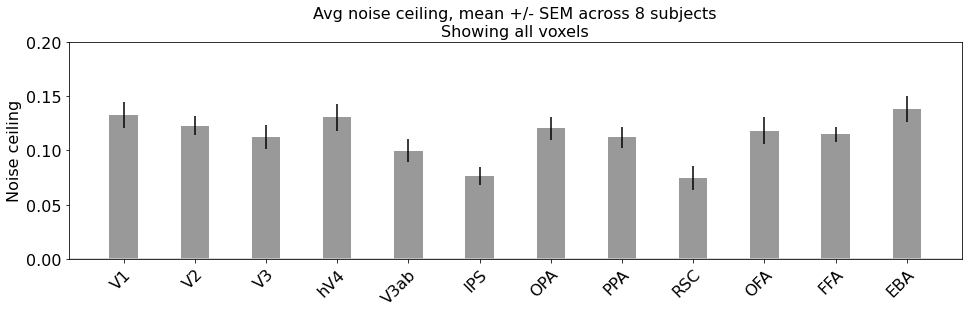

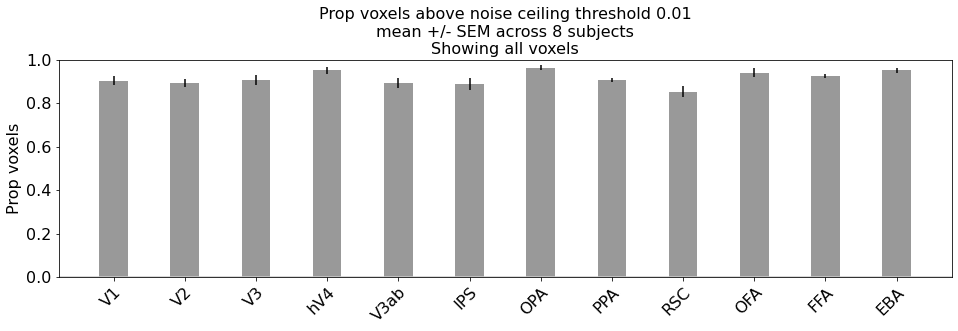

In [49]:
# Plot average noise ceiling each ROI

from utils import roi_utils, nsd_utils
from plotting import plot_utils
import matplotlib.pyplot as plt

roi_def = roi_utils.nsd_roi_def(subject=1, use_default_areas=True)
subjects = np.arange(1,9)
n_subjects = len(subjects)
n_rois = roi_def.n_rois
colors = np.array([[0.6, 0.6, 0.6]])

nc_vals = np.zeros((n_subjects, n_rois, 1))

prop_abv = np.zeros((n_subjects, n_rois, 1))

nc_thresh = 0.01                   
                    
fi=0

for si, ss in enumerate(subjects):
    
    roi_def = roi_utils.nsd_roi_def(subject=ss, use_default_areas=True)
    voxel_mask, _, _, ncsnr_full, _ = roi_utils.get_voxel_roi_info(ss, volume_space=True)
    noise_ceiling = nsd_utils.ncsnr_to_nc(ncsnr_full[voxel_mask])/100
  
    for ri in range(n_rois):

        inds_this_roi = roi_def.get_indices(ri)

        nc_vals[si,ri,fi] = np.mean(noise_ceiling[inds_this_roi])
        prop_abv[si,ri,fi] = np.mean(noise_ceiling[inds_this_roi]>nc_thresh)
                    
mean_vals = np.mean(nc_vals, axis=0)
sem_vals = np.std(nc_vals, axis=0) / np.sqrt(n_subjects)

legend_separate=True
title='Avg noise ceiling, mean +/- SEM across 8 subjects\nShowing all voxels'

plt.rcParams['pdf.fonttype']=42
plot_utils.set_all_font_sizes(fs = 16)
roi_names = roi_def.roi_names
fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, colors=colors, space=0.3, \
                xticklabels=roi_names, ylabel='Noise ceiling', \
                ylim=[0,0.20], title=title, horizontal_line_pos=0,\
                legend_labels=None, \
                legend_overlaid=False, legend_separate=False, \
                fig_size=(16,4))


fn2save = '/user_data/mmhender/imStat/figures/noise_ceiling.pdf'
plt.savefig(fn2save)
                    
mean_vals = np.mean(prop_abv, axis=0)
sem_vals = np.std(prop_abv, axis=0) / np.sqrt(n_subjects)

legend_separate=True
title='Prop voxels above noise ceiling threshold %.2f\nmean +/- SEM across 8 subjects\nShowing all voxels'%nc_thresh

plt.rcParams['pdf.fonttype']=42
plot_utils.set_all_font_sizes(fs = 16)
roi_names = roi_def.roi_names
fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, colors=colors, space=0.3, \
                xticklabels=roi_names, ylabel='Prop voxels', \
                ylim=[0,1.0], title=title, horizontal_line_pos=0,\
                legend_labels=None, \
                legend_overlaid=False, legend_separate=False, \
                fig_size=(16,4))


fn2save = '/user_data/mmhender/imStat/figures/prop_abv_noise_ceiling.pdf'
plt.savefig(fn2save)

In [31]:
# get a sense of how much overlap there is between retinotopic and category selective ROIs.
# most overlap is OPA/V3AB
roi_def.print_overlap()

V1: 1791 vox total
V2: 1494 vox total
V3: 1445 vox total
    79 vox overlap with OPA
    11 vox overlap with EBA
hV4: 543 vox total
    71 vox overlap with OFA
    55 vox overlap with FFA
V3ab: 654 vox total
    295 vox overlap with OPA
IPS: 2091 vox total
    225 vox overlap with OPA
OPA: 1360 vox total
    79 vox overlap with V3
    295 vox overlap with V3ab
    225 vox overlap with IPS
    153 vox overlap with EBA
PPA: 961 vox total
    15 vox overlap with FFA
RSC: 799 vox total
OFA: 331 vox total
    71 vox overlap with hV4
    130 vox overlap with EBA
FFA: 1204 vox total
    55 vox overlap with hV4
    15 vox overlap with PPA
EBA: 3184 vox total
    11 vox overlap with V3
    153 vox overlap with OPA
    130 vox overlap with OFA


In [30]:
# double check the groupings of smaller retinotopic ROIs into bigger ones

ret_group_names = roi_utils.ret_group_names
ret_group_inds = roi_utils.ret_group_inds

ret, face, place, body,  = roi_utils.load_roi_label_mapping(subject=1)

for gg, group_name in enumerate(ret_group_names):
    print(group_name)
    include = np.isin(ret[0], ret_group_inds[gg])
    print(np.array(ret[1])[include])

V1
['V1v' 'V1d']
V2
['V2v' 'V2d']
V3
['V3v' 'V3d']
hV4
['hV4']
VO1-2
['VO1' 'VO2']
PHC1-2
['PHC1' 'PHC2']
LO1-2
['LO2' 'LO1']
TO1-2
['TO2' 'TO1']
V3ab
['V3B' 'V3A']
IPS0-1
['IPS0' 'IPS1']
IPS2-5
['IPS2' 'IPS3' 'IPS4' 'IPS5']
SPL1
['SPL1']
FEF
['FEF']


In [35]:
# test the multi-subject ROI def
# (not thresholded)
roi_def = roi_utils.multi_subject_roi_def(np.arange(1,9), use_default_areas=True)
n_total = roi_def.get_sizes()[np.newaxis,:]
roi_df = pd.DataFrame(data=n_total, columns=roi_def.roi_names, \
                      index=['total'])
roi_df

,V1,V2,V3,hV4,V3ab,IPS,OPA,PPA,RSC,OFA,FFA,EBA
total,15016,12801,11958,4947,6330,16254,10694,8579,6139,4047,7119,28175
